In [2]:
import lob

import numpy as np, pandas as pd
import matplotlib as mpl, matplotlib.pyplot as plt

import importlib
importlib.reload(lob)

<module 'lob' from 'c:\\Users\\ebryce\\OneDrive\\Documents\\Projects\\LOB-Model\\microstructure\\lob.py'>

INFO:root:Randomizing the order book with 15 orders around 10.00; spread 0.05-0.15
DEBUG:root:No offer available, pricing at fair value 10.00 plus half the minimum spread 0.05
INFO:root:Creating a random S order for 100 shares at $10.02
DEBUG:root:No bid available, pricing at fair value 10.00 minus half the minimum spread 0.05
INFO:root:Creating a random B order for 100 shares at $9.98
INFO:root:Creating a random B order for 400 shares at $9.91
INFO:root:Creating a random B order for 300 shares at $9.90
INFO:root:Creating a random B order for 100 shares at $9.84
INFO:root:Creating a random S order for 300 shares at $10.02
INFO:root:Creating a random B order for 200 shares at $9.84
INFO:root:Creating a random S order for 100 shares at $10.04
INFO:root:Creating a random B order for 200 shares at $9.77
INFO:root:Creating a random S order for 300 shares at $10.11
INFO:root:Creating a random S order for 200 shares at $10.21
INFO:root:Creating a random B order for 100 shares at $9.72
INFO:ro

[]


DEBUG:matplotlib.axes._base:title position was updated manually, not adjusting


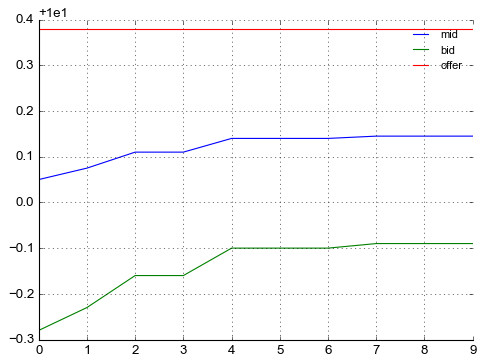

        bids  offers
10.38    0.0  9300.0
10.33    0.0   300.0
10.26    0.0   100.0
10.21    0.0   200.0
10.11    0.0     0.0
10.04    0.0     0.0
10.02    0.0     0.0
9.98   100.0     0.0
9.91   400.0     0.0
9.90     0.0     0.0
9.84     0.0     0.0
9.77     0.0     0.0
9.72     0.0     0.0


In [64]:
importlib.reload(lob)

market = lob.Market(randomize_environment=True)

books = {}
mids = []
bids = []
offers = []
trades = []
iters = 10
for i in range(iters):
    trade_print = market.lob.send(market._random_order(fair_value=market.lob.get_mid(), marketable=True))
    book = market.lob.get_level_2_book()
    books[i] = book
    mids.append(market.lob.get_mid())
    bids.append(market.lob.get_bid())
    offers.append(market.lob.get_offer())
    
    trades.extend(market.evolve())
books = pd.concat(books)
books = books.stack().unstack(1).unstack(1).dropna(axis=1)

mids, bids, offers = pd.Series({i: mids[i] for i in range(iters)}), pd.Series({i: bids[i] for i in range(iters)}), pd.Series({i: offers[i] for i in range(iters)})

plt.style.use('classic')
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 12})
fig = plt.figure(figsize=(7,5))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.grid(True,axis='both',linestyle=':')

ax.plot(mids, label='mid')
ax.plot(bids, label='bid')
ax.plot(offers, label='offer')

ax.legend(frameon=False, fontsize='small')

print(trades)
plt.show()

print(books.iloc[-1].unstack().T.sort_index(ascending=False))


In [45]:
a = np.nan

np.isnan(a)

True